In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
#Informacion de Localización
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt


In [55]:
df_order_historic_demand = pd.read_excel('C:/Users/JWinn01/Desktop/IABD/material/datos/Datos_P1/df_historic_order_demand.xlsx')
df_distance_km = pd.read_excel('C:/Users/JWinn01/Desktop/IABD/material/datos/Datos_P1/df_distance_km.xlsx')
df_distance_min = pd.read_excel('C:/Users/JWinn01/Desktop/IABD/material/datos/Datos_P1/df_distance_min.xlsx')
df_location = pd.read_excel('C:/Users/JWinn01/Desktop/IABD/material/datos/Datos_P1/df_location.xlsx')
df_orders = pd.read_excel('C:/Users/JWinn01/Desktop/IABD/material/datos/Datos_P1/df_orders.xlsx')
df_vehicle = pd.read_excel('C:/Users/JWinn01/Desktop/IABD/material/datos/Datos_P1/df_vehicle.xlsx')
print(df_order_historic_demand)

        cliente mes_anio  order_demand
0     Cliente_1  12-2020         857.0
1     Cliente_2  12-2020         941.0
2     Cliente_3  12-2020         878.0
3     Cliente_4  12-2020         949.0
4     Cliente_5  12-2020         932.0
..          ...      ...           ...
975  Cliente_16  12-2024         891.0
976  Cliente_17  12-2024         968.0
977  Cliente_18  12-2024         972.0
978  Cliente_19  12-2024         901.0
979  Cliente_20  12-2024         881.0

[980 rows x 3 columns]


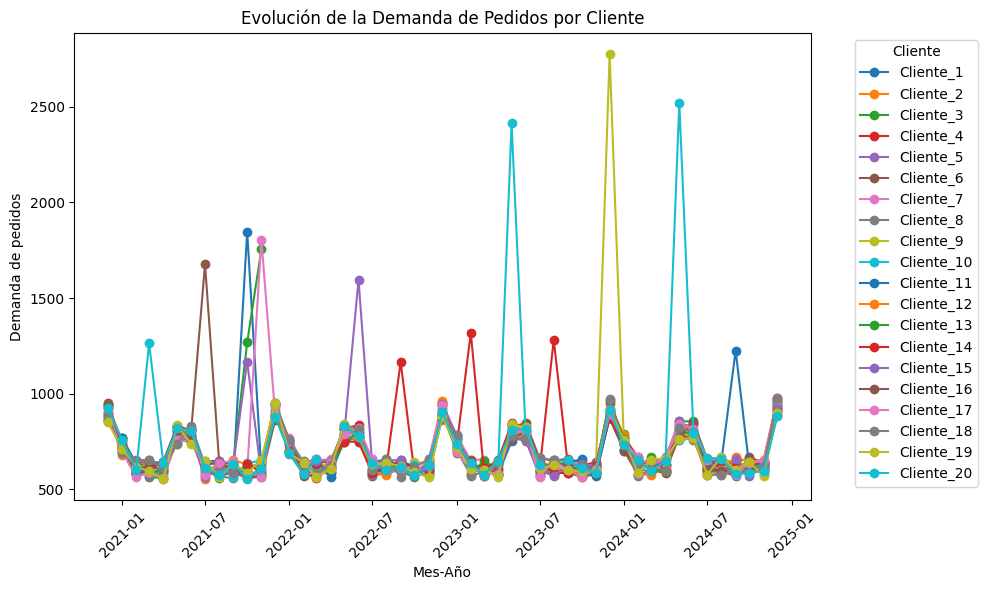

In [56]:
# Convertir la columna 'mes_anio' a tipo de fecha
df_order_historic_demand['mes_anio'] = pd.to_datetime(df_order_historic_demand['mes_anio'], format='%m-%Y')

plt.figure(figsize=(10, 6))

for cliente in df_order_historic_demand['cliente'].unique():
    df_cliente = df_order_historic_demand[df_order_historic_demand['cliente'] == cliente]
    plt.plot(df_cliente['mes_anio'], df_cliente['order_demand'], label=cliente, marker='o')

plt.xlabel('Mes-Año')
plt.ylabel('Demanda de pedidos')
plt.title('Evolución de la Demanda de Pedidos por Cliente')
plt.xticks(rotation=45)
plt.legend(title='Cliente', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


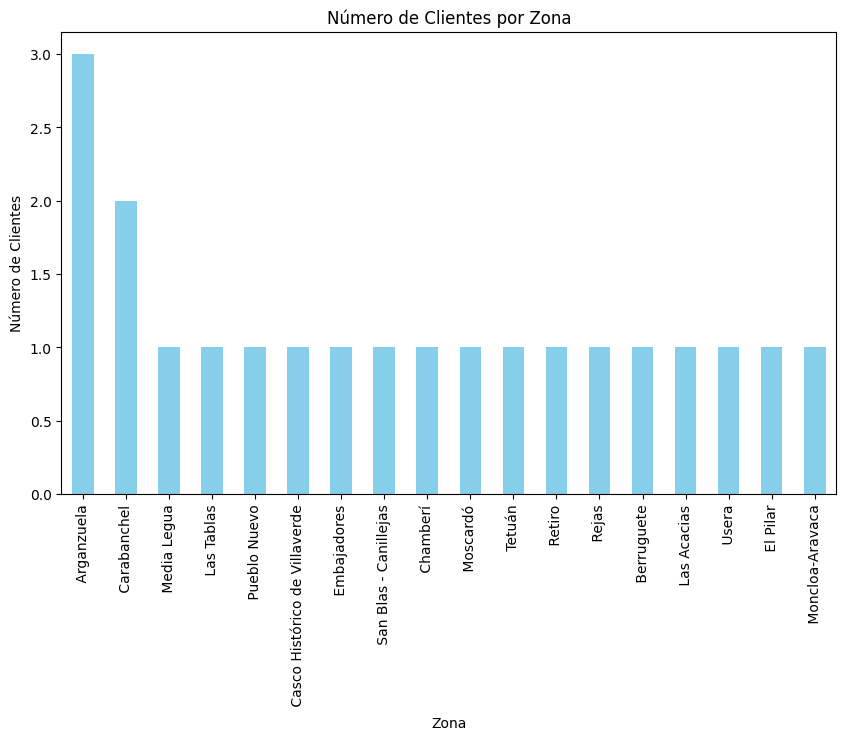

In [ ]:
geolocator = Nominatim(user_agent="mi_aplicacion")

# Función para obtener el nombre de la zona
def obtener_zona(lat, lon):
    location = geolocator.reverse((lat, lon), language='es')
    if location:
        return location.address
    else:
        return "Desconocido"
    
df_location["zona"] = df_location.apply(lambda row: obtener_zona(row['Latitud'], row['Longitud']), axis=1)

localizaciones = df_location["zona"].str.split(',', expand=True)

# Zona "localizadas creo"
#print(df_location["zona"])
zonas_count = localizaciones[3].value_counts()
plt.figure(figsize=(10, 6))
zonas_count.plot(kind='bar', color='skyblue')
plt.title('Clientes por Zona')
plt.xlabel('Zona')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=90)  
plt.show()


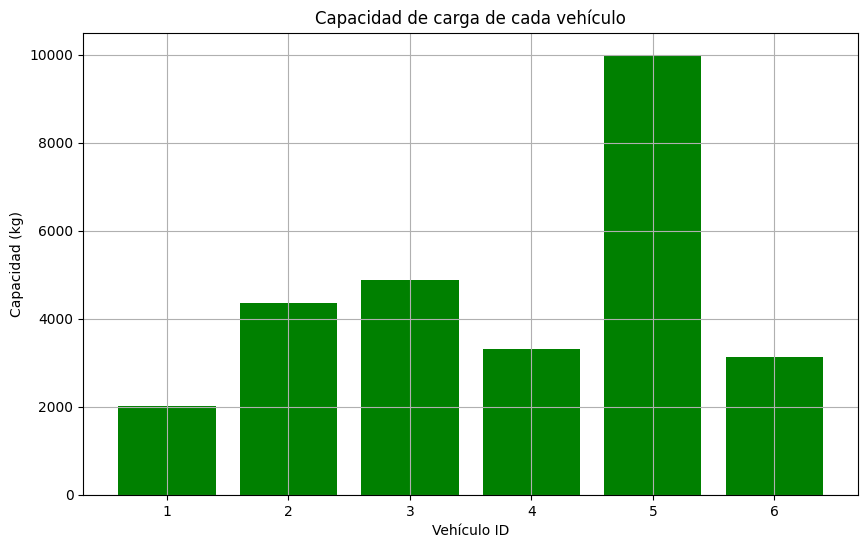

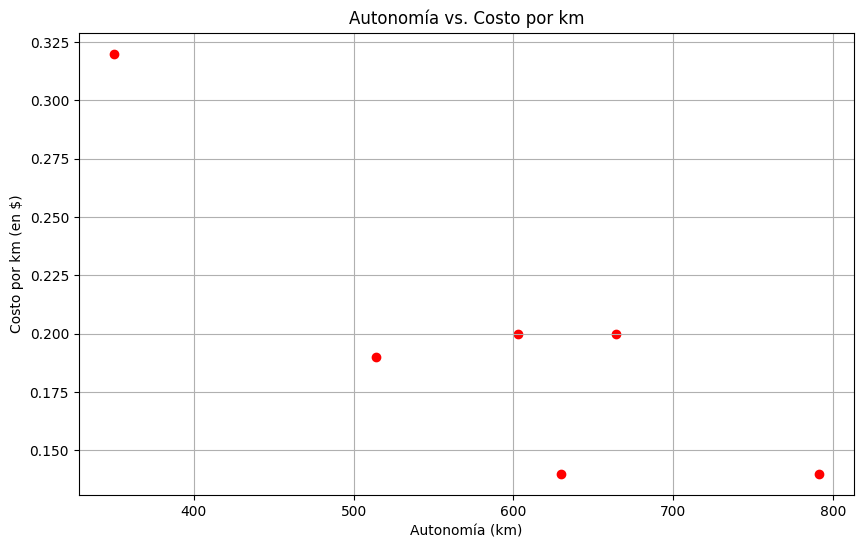

In [ ]:
#2 graficas para df_vehicle


plt.figure(figsize=(10, 6))
plt.bar(df_vehicle['vehiculo_id'], df_vehicle['capacidad_kg'], color='green')
plt.title('Capacidad kg de vehículo')
plt.xlabel('Id Vehículo')
plt.ylabel('Capacidad')
plt.xticks(df_vehicle['vehiculo_id'])
plt.grid(True)
plt.show()



plt.figure(figsize=(10, 6))
plt.scatter(df_vehicle['autonomia_km'], df_vehicle['costo_km'], color='red')
plt.title('Precio por km')
plt.xlabel('km')
plt.ylabel('Costo')
plt.grid(True)
plt.show()
